Saving titanic.jpeg to titanic (1).jpeg


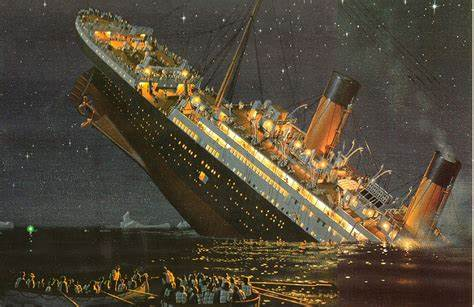

In [25]:
from google.colab import files
from IPython.display import Image, display

# Upload an image
uploaded = files.upload()

# Display the uploaded image
for filename in uploaded.keys():
    display(Image(filename=filename))


### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [17]:
train_data = pd.read_csv("/content/drive/MyDrive/TitanicDataset/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/TitanicDataset/test.csv")

### **EDA**

In [15]:
train_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [19]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_data.isnull().sum()*100/train_data.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [21]:
test_data.isnull().sum()*100/test_data.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [22]:
train_data.Survived.value_counts()*100/train_data.shape[0]

0    61.616162
1    38.383838
Name: Survived, dtype: float64

Text(0, 0.5, 'Passenger count')

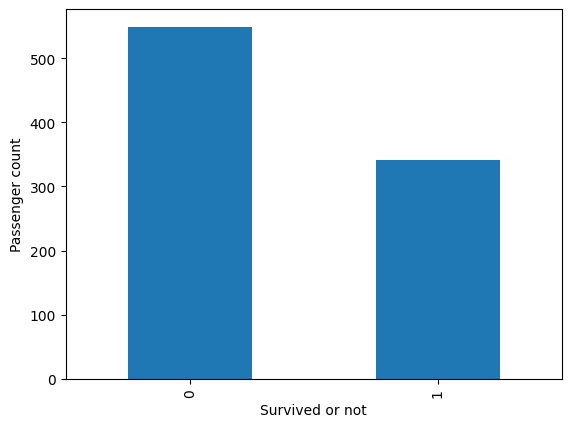

In [23]:
plt = train_data.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or not')
plt.set_ylabel("Passenger count")

Text(0, 0.5, 'Passenger count')

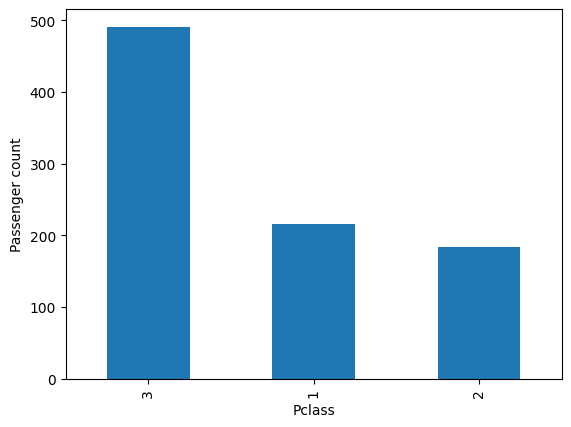

In [26]:
plt = train_data.Pclass.value_counts().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel("Passenger count")

<Axes: xlabel='Pclass', ylabel='count'>

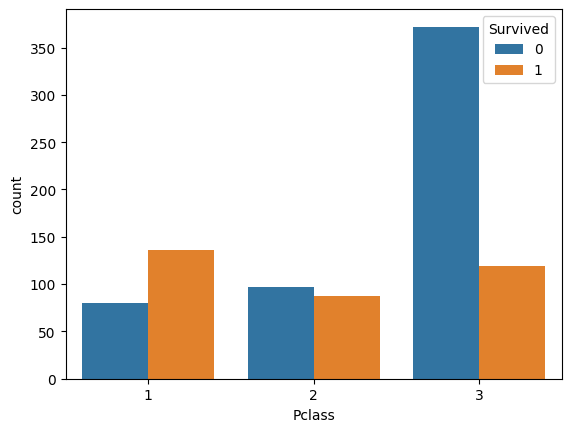

In [27]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

<Axes: xlabel='Sex', ylabel='count'>

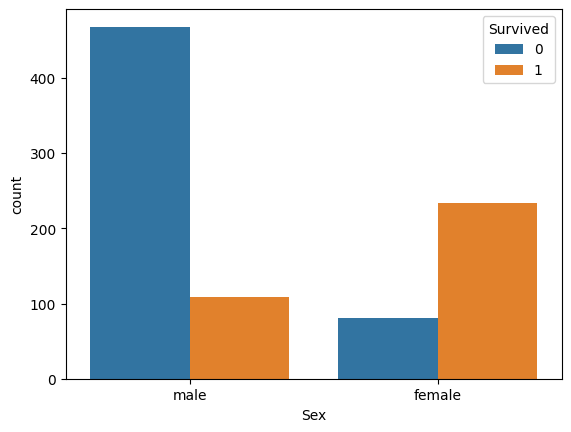

In [28]:
sns.countplot(x='Sex', hue='Survived', data=train_data)

<ipython-input-29-24cded17e1bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

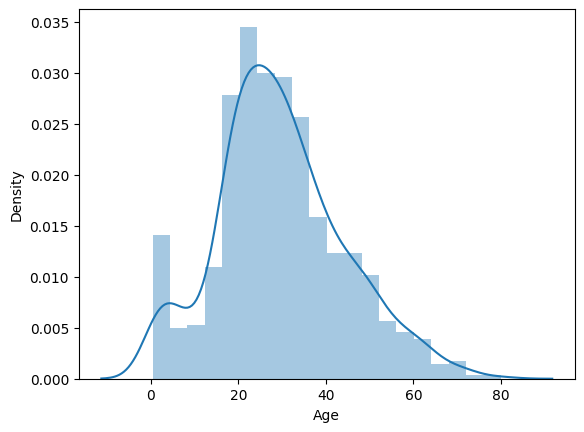

In [29]:
sns.distplot(train_data['Age'])

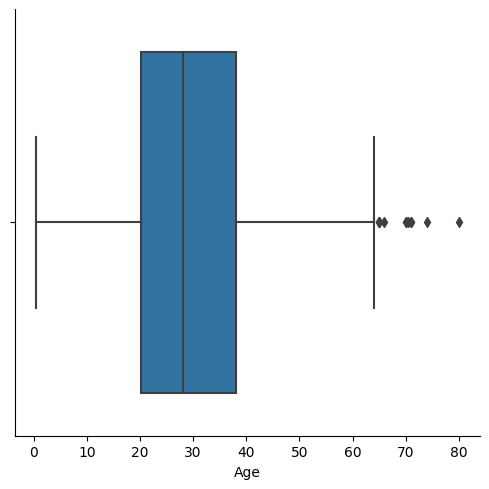

In [31]:
sns.catplot(x='Age', data = train_data, kind='box')

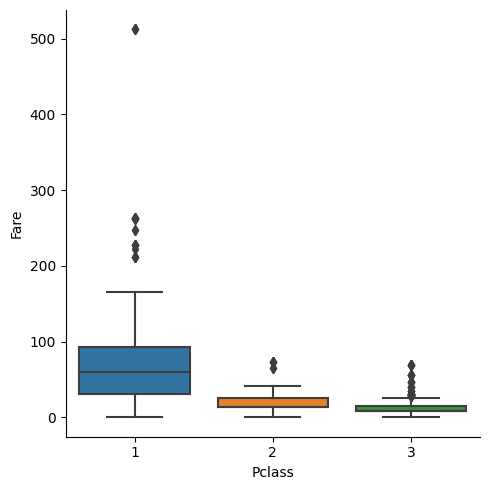

In [32]:
sns.catplot(x='Pclass', y='Fare', data = train_data, kind='box')

<ipython-input-33-dc3a8a176a50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

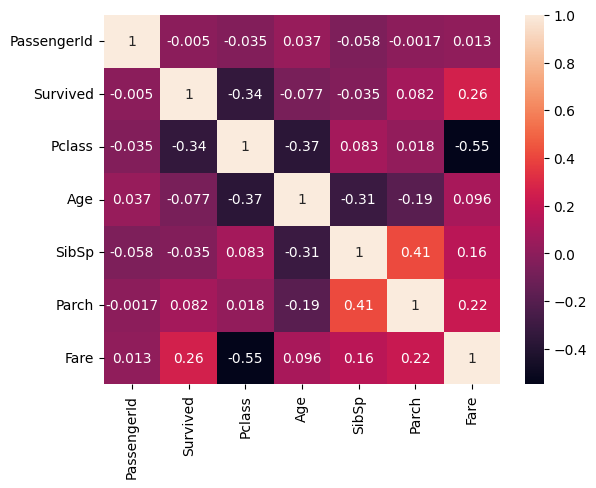

In [33]:
sns.heatmap(train_data.corr(), annot=True)

**Data Pre-processing**

In [34]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
drop_cols = ['Name', 'PassengerId', 'Ticket', 'Cabin']
train_data.drop(drop_cols, axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [38]:
age_mean = int(train_data['Age'].mean())
embarked_mode = train_data['Embarked'].mode()[0]
train_data['Age'].fillna(age_mean, inplace=True)
train_data['Embarked'].fillna(embarked_mode, inplace=True)

test_data['Age'].fillna(age_mean, inplace=True)
test_data['Embarked'].fillna(embarked_mode, inplace=True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

In [39]:
q1 = train_data['Age'].quantile(0.25)
q3 = train_data['Age'].quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

train_data = train_data[((train_data.Age >= ll) &
                     (train_data.Age <= ul))]
max_age_train = train_data['Age'].max()
min_age_train = train_data['Age'].min()

def cap_age(age):
    if age >= max_age_train:
        return max_age_train
    if age <= min_age_train:
        return min_age_train
    return age
test_data['Age'] = test_data['Age'].apply(lambda x: cap_age(x))

In [ ]:
df_c1_train = train_data[train_data.Pclass == 1]
df_c2_train = train_data[train_data.Pclass == 2]
df_c3_train = train_data[train_data.Pclass == 3]

df_c1_test = test_data[test_data.Pclass == 1]
df_c2_test = test_data[test_data.Pclass == 2]
df_c3_test = test_data[test_data.Pclass == 3]

def cap_fare(fare, max_fare, min_fare):
    if fare >= max_fare:
        return max_fare
    if fare <= min_fare:
        return min_fare
    return fare

def celan_fare(df_train, df_test):
    q1 = df_train['Fare'].quantile(0.25)
    q3 = df_train['Fare'].quantile(0.75)
    iqr = q3-q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df_train = df_train[((df_train.Fare >= ll) &
                     (df_train.Fare <= ul))]
    max_fare, min_fare = df_train['Fare'].max(), df_train['Fare'].min()
    df_test['Fare'] = df_test['Fare'].apply(lambda x: cap_fare(x,
                                                               max_fare,
                                                               min_fare))
    return df_train, df_test

df1, df2 = celan_fare(df_c1_train, df_c1_test)
df3, df4 = celan_fare(df_c2_train, df_c2_test)
df5, df6 = celan_fare(df_c3_train, df_c3_test)

train_data = pd.concat([df1, df3, df5])
test_data = pd.concat([df2, df4, df6])

In [42]:
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == "male" else 0)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q':3})

test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == "male" else 0)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q':3})

In [43]:
temp = train_data
temp['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q':3})

In [44]:
temp['Embarked']

1     NaN
3     NaN
6     NaN
23    NaN
30    NaN
       ..
881   NaN
882   NaN
884   NaN
888   NaN
890   NaN
Name: Embarked, Length: 753, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
features = train_data.drop("Survived", axis=1)#x
labels = train_data["Survived"] #y, class
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2,
                                                    random_state=123)

### **ML Models**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, y_test):
	pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, pred)
	precision = precision_score(y_test, pred, average='macro')
	recall = recall_score(y_test, pred, average='macro')
	f1 = f1_score(y_test, pred, average='macro')
	print(classification_report(y_test, pred))
	print('Accuracy: %f' % accuracy)
	print('Precision: %f' % precision)
	print('Recall: %f' % recall)
	print('F1 score: %f' % f1)
	print("================================================================")

In [52]:
DT_clf = DecisionTreeClassifier()
RF_clf = RandomForestClassifier()


In [60]:
# Assuming RF_clf and DT_clf are instances of RandomForestClassifier and DecisionTreeClassifier

models = {
    "RF": RF_clf,
    "DT": DT_clf
}

for name, model in models.items():
    print(name)
    # Fit the model first
    model.fit(x_train.drop(['Embarked'], axis=1), y_train)

    # Then perform hyperparameter tuning or any other evaluation
    evaluate(model, x_test.drop(['Embarked'], axis=1), y_test)


RF
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        91
           1       0.53      0.53      0.53        60

    accuracy                           0.63       151
   macro avg       0.61      0.61      0.61       151
weighted avg       0.63      0.63      0.63       151

Accuracy: 0.629139
Precision: 0.612821
Recall: 0.612821
F1 score: 0.612821
DT
              precision    recall  f1-score   support

           0       0.65      0.66      0.66        91
           1       0.47      0.47      0.47        60

    accuracy                           0.58       151
   macro avg       0.56      0.56      0.56       151
weighted avg       0.58      0.58      0.58       151

Accuracy: 0.582781
Precision: 0.563375
Recall: 0.563004
F1 score: 0.563163


In [53]:
x_test.drop(['Embarked'], axis=1).columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [54]:
test_data.drop(['Embarked'], axis=1).columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [55]:
final_model = RandomForestClassifier()
final_model.fit(x_train.drop(['Embarked'], axis=1), y_train)

RandomForestClassifier()

### **Prediction**

In [56]:
pred = final_model.predict(test_data.drop(['PassengerId', 'Embarked'], axis=1))

In [57]:
test_data['Survived'] = pred

In [58]:
submission = test_data[['PassengerId', 'Survived']]

In [59]:
submission.to_csv("submission.csv", index=False)